# 📊 Projet Python – Analyse des données scolaires

🎯 Objectif du projet

L’objectif de ce projet est d’analyser les données d’une école afin de :

* Analyser le nombre d’élèves par cycle scolaire et par genre
* Analyser les revenus générés par les frais de scolarité
* Étudier l’évolution des revenus par mois
* Visualiser les résultats avec Matplotlib

Le projet suit les étapes classiques d’un workflow de data analyst :

1. Génération de données (avec erreurs)

2. Chargement et exploration

3. Nettoyage des données

4. Analyse

5. Visualisation

## 📌 Étape 1 — Génération des données (avec erreurs volontaires)

Nous générons un fichier CSV contenant des erreurs volontaires (données manquantes, fautes, incohérences).
📁 Colonnes du dataset
* student_id
* name
* cycle (Primary, Secondary, High)
* gender (Male, Female)
* fees_paid (frais de scolarité)
* month (mois de paiement)

In [1]:

import pandas as pd
import random

random.seed(42)

cycles = ["Primaire", "Collège", "Lycée", "Primery", "Secondaire", None]
genders = ["Masculin", "Féminin", "M", "F", "Masc", "", None]
months = [
    "Janvier", "Février", "Mars", "Avril",
    "Mai", "Juin", "Juillet", "Août",
    "Septembre", "Octobre", "Novembre", "Décembre",
    None
]

data = []

for i in range(1, 10000):
    student = {
        "id": i,
        "nom": f"eleve_{i}",
        "cycle": random.choice(cycles),
        "genre": random.choice(genders),
        "frais": random.choice([500, 800, 1000, 1200, "1000", 0, -300, None]),
        "mois": random.choice(months)
    }
    data.append(student)

df = pd.DataFrame(data)
df.to_csv("school_data.csv", index=False)

df.head(10)


,id,nom,cycle,genre,frais,mois
0,1,eleve_1,None,Masculin,500,Décembre
1,2,eleve_2,Lycée,Féminin,1200,Mars
2,3,eleve_3,None,Masculin,800,Octobre
3,4,eleve_4,Primery,Masculin,500,Février
4,5,eleve_5,Collège,Féminin,500,Septembre
5,6,eleve_6,Collège,,-300,Avril
6,7,eleve_7,Primery,Masc,1000,None
7,8,eleve_8,Primaire,None,1000,Décembre
8,9,eleve_9,Primery,M,1000,Mars
9,10,eleve_10,Collège,None,0,Février


## 📌 Étape 2 — Chargement et exploration des données

In [2]:

df = pd.read_csv("school_data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      9999 non-null   int64  
 1   nom     9999 non-null   object 
 2   cycle   8326 non-null   object 
 3   genre   7139 non-null   object 
 4   frais   8800 non-null   float64
 5   mois    9206 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.8+ KB


## 📌 Étape 3 — Nettoyage des données

In [3]:

df["cycle"] = df["cycle"].replace({
    "Primery": "Primaire",
    "Secondaire": "Collège",
})
df["cycle"] = df["cycle"].fillna("Inconnu")

df["genre"] = df["genre"].replace({
    "M": "Masculin",
    "F": "Féminin",
    "male": "Masculin",
    "": None
})
df["genre"] = df["genre"].fillna("Inconnu")

df["frais"] = pd.to_numeric(df["frais"], errors="coerce")
df.loc[df["frais"] <= 0, "frais"] = None
df["frais"] = df["frais"].fillna(df["frais"].mean())
df["mois"] = df["mois"].fillna("Inconnu")

df.head(10)


,id,nom,cycle,genre,frais,mois
0,1,eleve_1,Inconnu,Masculin,500.000000,Décembre
1,2,eleve_2,Lycée,Féminin,1200.000000,Mars
2,3,eleve_3,Inconnu,Masculin,800.000000,Octobre
3,4,eleve_4,Primaire,Masculin,500.000000,Février
4,5,eleve_5,Collège,Féminin,500.000000,Septembre
5,6,eleve_6,Collège,Inconnu,899.634166,Avril
6,7,eleve_7,Primaire,Masc,1000.000000,Inconnu
7,8,eleve_8,Primaire,Inconnu,1000.000000,Décembre
8,9,eleve_9,Primaire,Masculin,1000.000000,Mars
9,10,eleve_10,Collège,Inconnu,899.634166,Février


## 📌 Étape 4 — Analyse des données

In [4]:

students_by_cycle = df["cycle"].value_counts()
students_by_gender = df["genre"].value_counts()
revenue_by_cycle = df.groupby("cycle")["frais"].sum()
revenue_by_month = df.groupby("mois")["frais"].sum()

students_by_cycle, students_by_gender, revenue_by_cycle, revenue_by_month


(cycle
 Collège     3365
 Primaire    3346
 Inconnu     1673
 Lycée       1615
 Name: count, dtype: int64,
 genre
 Féminin     2868
 Masculin    2861
 Inconnu     2860
 Masc        1410
 Name: count, dtype: int64,
 cycle
 Collège     3.021042e+06
 Inconnu     1.517376e+06
 Lycée       1.450582e+06
 Primaire    3.006441e+06
 Name: frais, dtype: float64,
 mois
 Août         716392.078893
 Avril        658795.005567
 Décembre     708499.761412
 Février      707192.810561
 Inconnu      707194.639733
 Janvier      722989.152219
 Juillet      699490.615556
 Juin         684100.127247
 Mai          656903.419755
 Mars         721788.786385
 Novembre     684191.713059
 Octobre      687300.127247
 Septembre    640603.785589
 Name: frais, dtype: float64)

## 📌 Étape 5 — Visualisation avec Matplotlib

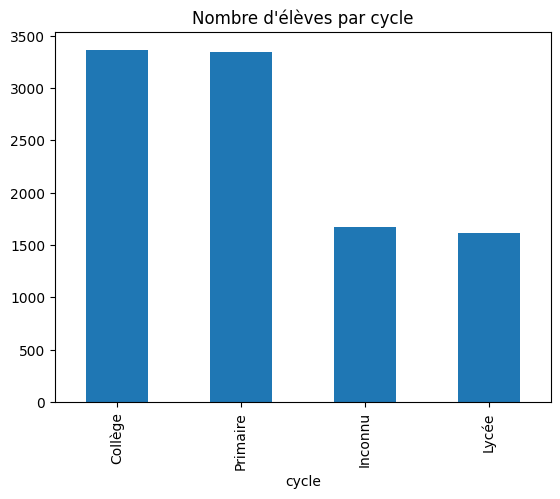

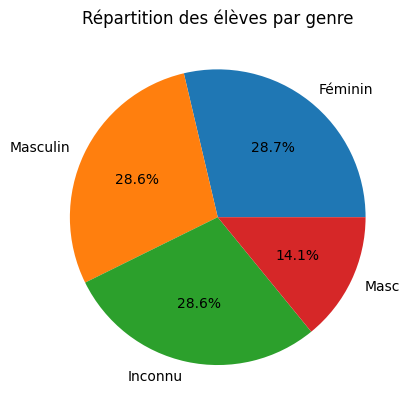

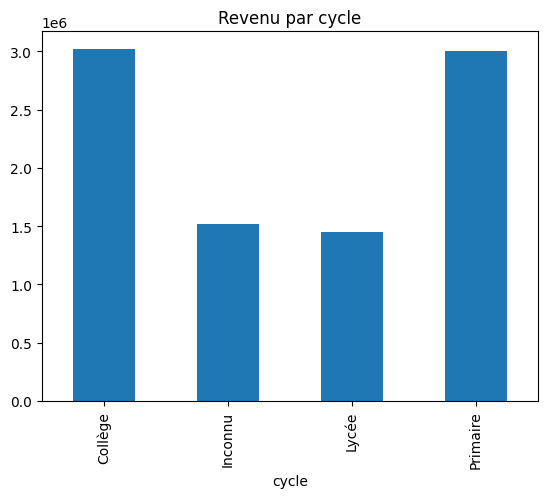

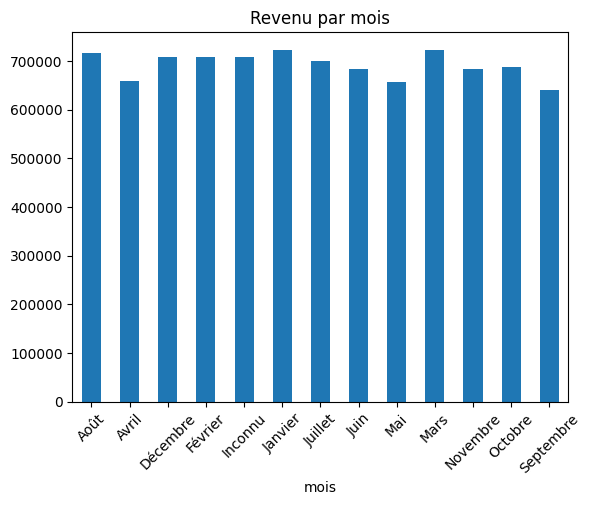

In [5]:

import matplotlib.pyplot as plt

students_by_cycle.plot(kind="bar")
plt.title("Nombre d'élèves par cycle")
plt.show()

students_by_gender.plot(kind="pie", autopct="%1.1f%%")
plt.title("Répartition des élèves par genre")
plt.ylabel("")
plt.show()

revenue_by_cycle.plot(kind="bar")
plt.title("Revenu par cycle")
plt.show()

revenue_by_month.plot(kind="bar")
plt.title("Revenu par mois")
plt.xticks(rotation=45)
plt.show()

 


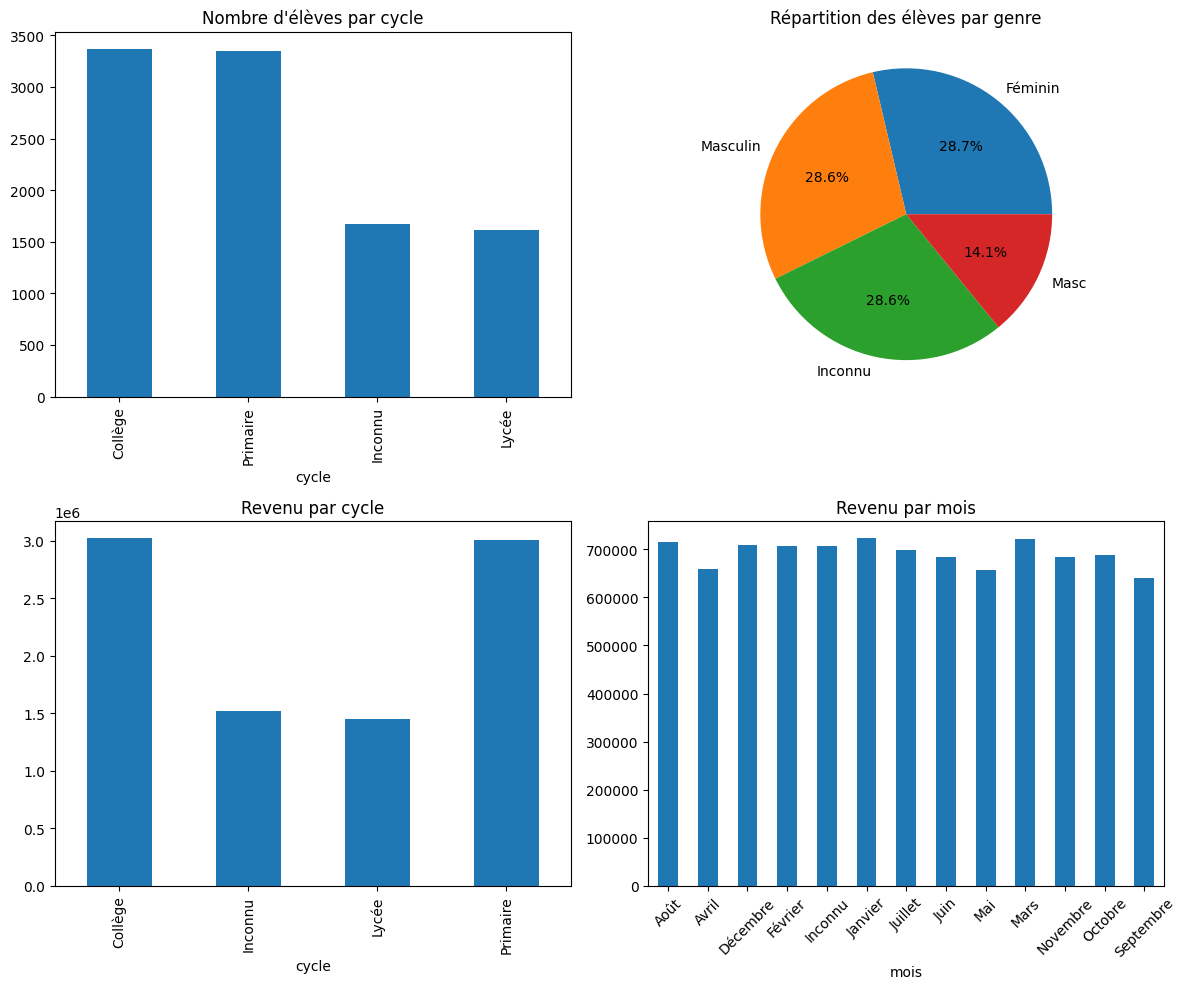

In [6]:
# Utilisation de subplots pour afficher tous les graphiques ensemble
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
students_by_cycle.plot(kind="bar", ax=axs[0, 0], title="Nombre d'élèves par cycle")
students_by_gender.plot(kind="pie", autopct="%1.1f%%", ax=axs[0, 1], title="Répartition des élèves par genre", ylabel="")
revenue_by_cycle.plot(kind="bar", ax=axs[1, 0], title="Revenu par cycle")
revenue_by_month.plot(kind="bar", ax=axs[1, 1], title="Revenu par mois", rot=45)
plt.tight_layout()
plt.show() 